<div style="background-color: green;text-align:center;padding: 20px;font-size: 16px;color:white;">
USED CAR PRICE PREDICTION
</div>
<div style="background-color: #303030;text-align:right;padding: 10px;font-size: 16px;color:white;">
DIWAS PANDEY - AI ML INTERESTSHIP
</div>

Used cars are priced based on their Brand, Manufacturer, Transmission type and etc etc. This process is done by a professional who understands the condition and the right pricing scheme of the used cars form his/hers previous experiences. Our goal is to make a Model which can give an estimate of the price that should be intended for the used cars, based on historical data. Here we have used only car datasets. & whole train, test and evaluation process will be done on Amazon Sagemaker

# IMPORTING REQUIRED LIBRARIES

In [1]:
import pandas as pd
#libraries for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


import matplotlib
import matplotlib.pyplot as plt

# IMPORT DATASET & VISUALIZATION

In [3]:
data = pd.read_csv('car-dataset.csv')
data.head(20)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
#checking null data
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

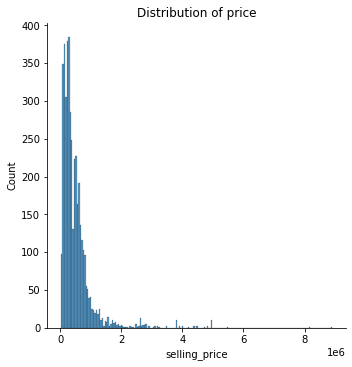

In [7]:
import seaborn as sns

sns.displot(data1.selling_price)
plt.tight_layout()
plt.title("Distribution of price")
plt.savefig('Insight-Dist-Plot',dpi=600)
plt.show()

/home/ds/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/ds/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/ds/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


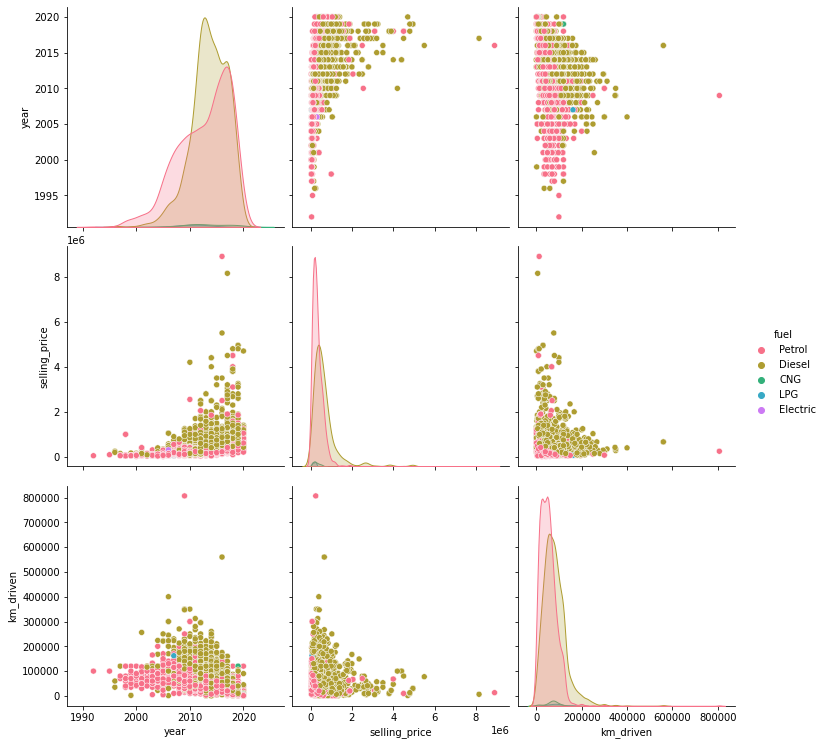

In [8]:
sns.pairplot(data1,hue='fuel',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

<div style="background-color: blue;text-align:center;padding: 20px;font-size: 16px;color:white;">
TRANSFORMING CATEGORICAL DATA
</div>

In [9]:
#visualize columns
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [10]:
#defining numerical and categorical values

num_col=['year','selling_price','km_driven']
cat_cols=['name','fuel','seller_type','transmission','owner']

In [11]:
le=preprocessing.LabelEncoder()
data[cat_cols]=data[cat_cols].apply(le.fit_transform)

In [12]:
data.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,775,2007,60000,70000,4,1,1,0
1,1041,2007,135000,50000,4,1,1,0
2,505,2012,600000,100000,1,1,1,0
3,118,2017,250000,46000,4,1,1,0
4,279,2014,450000,141000,1,1,1,2
5,812,2007,140000,125000,4,1,1,0
6,545,2016,550000,25000,4,1,1,0
7,1256,2014,240000,60000,4,1,1,2
8,390,2015,850000,25000,4,1,1,0
9,834,2017,365000,78000,0,1,1,0


<div style="background-color: red;text-align:center;padding: 20px;font-size: 16px;color:black;">
IMPORTANCE OF FEATURE/COLUMN DATA
</div>

As the name suggests, the Random forest is a “forest” of trees! i.e Decision Trees. A random forest is a tree-based machine learning algorithm that randomly selects specific features to build multiple decision trees. The random forest then combines the output of individual decision trees to generate the final output.

In this project, we are using Random Forest Classifier to calculate the importance of column data on model.

In [13]:
#libraries for evaluation
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split


#function to split dataset int training and test
def trainingData(df,n):
    X = df.iloc[:,n]
    y = df.iloc[:,-1:].values.T
    y=y[0]
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.9,test_size=0.1,random_state=0)
    return (X_train,X_test,y_train,y_test)

X_train,X_test,y_train,y_test=trainingData(data,list(range(len(list(data.columns))-1)))

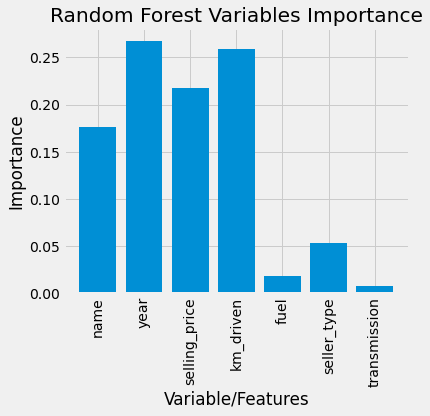

In [14]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=280,random_state=40, min_samples_leaf=4, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(X_train,y_train)

importances=RFR.feature_importances_
features=X_train.columns

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(6,6))
plt.bar(x_values, importances, orientation = ('vertical'))
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable/Features'); 
plt.title('Random Forest Variables Importance')
plt.tight_layout()
plt.savefig('Random-Forest-Variables-Importances.jpg',dpi=800)
plt.show();

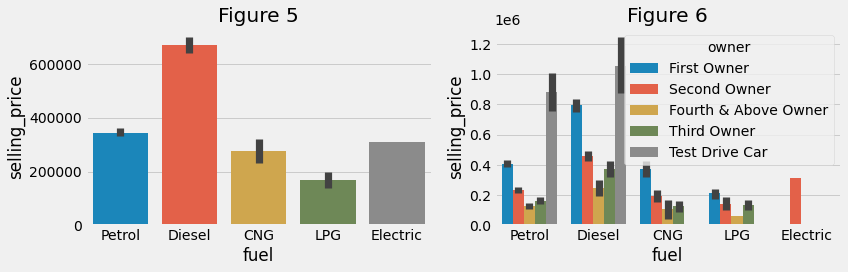

In [15]:
fig,axs=plt.subplots(ncols=2)
fig.set_size_inches(12,4)
sns.barplot(x='fuel',y='selling_price',data=data1,ax=axs[0])
sns.barplot(x='fuel',y='selling_price',hue='owner',data=data1,ax=axs[1])
axs[0].set_title('Figure 5')
axs[1].set_title('Figure 6')
plt.tight_layout()
plt.savefig('Insight-Figure-5-6.jpg',dpi=600)
plt.show()

<div style="background-color: green;text-align:center;padding: 20px;font-size: 16px;color:white;">
FITTING THE MODEL - RFG
</div>

In [ ]:
#libraries for models
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV

from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestRegressor



from sklearn.ensemble import AdaBoostRegressor

In [16]:
transmission = pd.get_dummies(data['transmission'])
fuel = pd.get_dummies(data['fuel'])
owner = data['owner']

X = pd.concat([transmission,fuel,owner,data.drop(['transmission','fuel','owner','selling_price'],axis=1)],axis=1)
y = data['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

# Random Forest Regressor

In [26]:
model = RandomForestRegressor(criterion='mse',n_estimators=60)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.7557785985459524

# ADABOOST

In [27]:
#Adaboost
ABR = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=24),
    n_estimators=200,learning_rate=0.6
)

ABR.fit(X_train, y_train)
y_pred = ABR.predict(X_test)
r2_score(y_test, y_pred)

0.802061085292957

# LASSO REGRESSION

In [28]:
#model object and fitting it
lasso=Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)
r2_score(y_test, y_pred)

0.4535966961236344

# LINEAR REGRESSION

In [29]:
#fitting model
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
r2_score(y_test, y_pred)

0.453209032428854

<div style="background-color: yellow;text-align:center;padding: 20px;font-size: 16px;color:black;">
&copy; Diwas Pandey
</div>